## Janojit Chakraborty (21112011)
## Rishab Bolisetty (21112033)
----------------------------------------------------------------------------------

### Chess Quest: The Cows and Bulls Challenge

The code you provided is a Python program that implements a two-player chess game. It allows two players to play chess against each other on an 8x8 chessboard. The game includes features like selecting and moving pieces, capturing opponent pieces, and checking for a checkmate condition. It also displays a game over message when one player wins the game.

The program also includes a portion at the beginning that seems to be related to a "Cows and Bulls" game, which is a guessing game. In this game, two players take turns guessing a 4-digit number, and the player who guesses the number in fewer tries wins. The player who wins this guessing game gets to play as White in the chess game.

To make a report of this game, you can describe the following key aspects of the code:

1. Game Rules:
   - Explain that the code allows two players to play chess against each other.
   - Describe the rules of chess, including how pieces move, capturing, and checkmate conditions.
   - Mention the capturing of opponent pieces and how it affects the game.

2. Chessboard:
   - Describe the layout of the chessboard, including the 8x8 grid.
   - Explain how the pieces are initially arranged on the board (starting positions).

3. Player Interaction:
   - Explain how players select and move their pieces by clicking on the chessboard.
   - Mention that valid moves are displayed on the screen.

4. End of Game:
   - Describe the conditions for ending the chess game.
   - Explain how the program determines the winner and displays a game over message.

5. Cows and Bulls Game:
   - Mention the part of the code that involves a "Cows and Bulls" game.
   - Explain the rules of this guessing game, where players guess a 4-digit number without repeating digits.

6. Player Assignment:
   - Mention that the winner of the "Cows and Bulls" game gets to play as White in the chess game.

7. Execution:
   - Explain that the program runs in a loop until the chess game is over, and players can restart the game by pressing ENTER after a game over.

The code uses the Pygame library for graphics and user interface in the chess game..

In [1]:
import random
import subprocess


def getDigits(num):
    return [int(i) for i in str(num)]

def noDuplicates(num):
    num_li = getDigits(num)
    if len(num_li) == len(set(num_li)):
        return True
    else:
        return False

def generateNum():
    while True:
        num = random.randint(1000, 9999)
        if noDuplicates(num):
            return num

def numOfBullsCows(num, guess):
    bull_cow = [0, 0]
    num_li = getDigits(num)
    guess_li = getDigits(guess)
    
    for i, j in zip(num_li, guess_li):
        if j in num_li:
            if j == i:
                bull_cow[0] += 1
            else:
                bull_cow[1] += 1
    
    return bull_cow

def play_game(player_name):
    print(f"{player_name}, it's your turn to guess the number.")
    num = generateNum()
    tries = 0

    while True:
        guess = int(input(f"{player_name}, enter your guess: "))

        if not noDuplicates(guess):
            print("Number should not have repeated digits. Try again.")
            continue
        if guess < 1000 or guess > 9999:
            print("Enter a 4-digit number only. Try again.")
            continue

        bull_cow = numOfBullsCows(num, guess)
        print(f"{guess}: {bull_cow[0]} bulls, {bull_cow[1]} cows")
        tries += 1

        if bull_cow[0] == 4:
            print(f"Congratulations, {player_name}! You guessed right in {tries} tries!")
            return tries

if __name__ == "__main__":
    player1_name_ = input("Enter the name of Player 1: ")
    player2_name_ = input("Enter the name of Player 2: ")

    player1_tries = play_game(player1_name_)
    player2_tries = play_game(player2_name_)

    if player1_tries < player2_tries:
        print(f"{player1_name_} wins! They get to play chess first.")
        player1_name = player1_name_
        player2_name = player2_name_
        # Redirect to the chess game here.

    elif player1_tries > player2_tries:
        print(f"{player2_name_} wins! They get to play chess first.")
        player1_name = player2_name_
        player2_name = player1_name_
        # Redirect to the chess game here.

    else:
        print("It's a tie! Both players guessed in the same number of tries.")

# Importing Modules
import pygame

# Initialising pygame module
pygame.init()

# Setting Width and height of the Chess Game screen
WIDTH = 800
HEIGHT = 800

screen = pygame.display.set_mode([WIDTH, HEIGHT])
pygame.display.set_caption('Two-Player Chess Game')

font = pygame.font.Font('freesansbold.ttf', 20)
medium_font = pygame.font.Font('freesansbold.ttf', 40)
big_font = pygame.font.Font('freesansbold.ttf', 50)

timer = pygame.time.Clock()
fps = 60

# game variables and images
white_pieces = ['rook', 'knight', 'bishop', 'king', 'queen', 'bishop', 'knight', 'rook',
                'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn']
white_locations = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0),
                   (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
black_pieces = ['rook', 'knight', 'bishop', 'king', 'queen', 'bishop', 'knight', 'rook',
                'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn']
black_locations = [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7),
                   (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6)]

captured_pieces_white = []
captured_pieces_black = []

# 0 - whites turn no selection: 1-whites turn piece selected: 2- black turn no selection, 3 - black turn piece selected
turn_step = 0
selection = 100
valid_moves = []

# load in game piece images (queen, king, rook, bishop, knight, pawn) x 2
black_queen = pygame.image.load('./img/black_queen.png')
black_queen = pygame.transform.scale(black_queen, (80, 80))
black_queen_small = pygame.transform.scale(black_queen, (45, 45))
black_king = pygame.image.load('./img/black_king.png')
black_king = pygame.transform.scale(black_king, (80, 80))
black_king_small = pygame.transform.scale(black_king, (45, 45))
black_rook = pygame.image.load('./img/black_rook.png')
black_rook = pygame.transform.scale(black_rook, (80, 80))
black_rook_small = pygame.transform.scale(black_rook, (45, 45))
black_bishop = pygame.image.load('./img/black_bishop.png')
black_bishop = pygame.transform.scale(black_bishop, (80, 80))
black_bishop_small = pygame.transform.scale(black_bishop, (45, 45))
black_knight = pygame.image.load('./img/black_knight.png')
black_knight = pygame.transform.scale(black_knight, (80, 80))
black_knight_small = pygame.transform.scale(black_knight, (45, 45))
black_pawn = pygame.image.load('./img/black_pawn.png')
black_pawn = pygame.transform.scale(black_pawn, (65, 65))
black_pawn_small = pygame.transform.scale(black_pawn, (45, 45))
white_queen = pygame.image.load('./img/white_queen.png')
white_queen = pygame.transform.scale(white_queen, (80, 80))
white_queen_small = pygame.transform.scale(white_queen, (45, 45))
white_king = pygame.image.load('./img/white_king.png')
white_king = pygame.transform.scale(white_king, (80, 80))
white_king_small = pygame.transform.scale(white_king, (45, 45))
white_rook = pygame.image.load('./img/white_rook.png')
white_rook = pygame.transform.scale(white_rook, (80, 80))
white_rook_small = pygame.transform.scale(white_rook, (45, 45))
white_bishop = pygame.image.load('./img/white_bishop.png')
white_bishop = pygame.transform.scale(white_bishop, (80, 80))
white_bishop_small = pygame.transform.scale(white_bishop, (45, 45))
white_knight = pygame.image.load('./img/white_knight.png')
white_knight = pygame.transform.scale(white_knight, (80, 80))
white_knight_small = pygame.transform.scale(white_knight, (45, 45))
white_pawn = pygame.image.load('./img/white_pawn.png')
white_pawn = pygame.transform.scale(white_pawn, (65, 65))
white_pawn_small = pygame.transform.scale(white_pawn, (45, 45))

white_images = [white_pawn, white_queen, white_king,
                white_knight, white_rook, white_bishop]
small_white_images = [white_pawn_small, white_queen_small, white_king_small, white_knight_small,
                      white_rook_small, white_bishop_small]

black_images = [black_pawn, black_queen, black_king,
                black_knight, black_rook, black_bishop]
small_black_images = [black_pawn_small, black_queen_small, black_king_small, black_knight_small,
                      black_rook_small, black_bishop_small]

piece_list = ['pawn', 'queen', 'king', 'knight', 'rook', 'bishop']

# check variables/ flashing counter
counter = 0
winner = ''
game_over = False


# draw main game board
def draw_board():
    for i in range(32):
        column = i % 4
        row = i // 4
        if row % 2 == 0:
            pygame.draw.rect(screen, 'light gray', [
                             600 - (column * 200), row * 100, 100, 100])
        else:
            pygame.draw.rect(screen, 'light gray', [
                             700 - (column * 200), row * 100, 100, 100])
        pygame.draw.rect(screen, 'gray', [0, 800, WIDTH, 100])
        pygame.draw.rect(screen, 'gold', [0, 800, WIDTH, 100], 5)
        pygame.draw.rect(screen, 'gold', [800, 0, 200, HEIGHT], 5)
        screen.blit(medium_font.render(player1_name, True, 'black'), (10, 17))
        screen.blit(medium_font.render(player2_name, True, 'black'), (610, 710))
        status_text = [f'{player1_name}: Select a Piece to Move!', f'{player1_name}: Select a Destination!',
                       f'{player2_name}: Select a Piece to Move!', f'{player2_name}: Select a Destination!']
        screen.blit(big_font.render(
            status_text[turn_step], True, 'black'), (20, 820))
        for i in range(9):
            pygame.draw.line(screen, 'black', (0, 100 * i), (800, 100 * i), 2)
            pygame.draw.line(screen, 'black', (100 * i, 0), (100 * i, 800), 2)
        screen.blit(medium_font.render('FORFEIT', True, 'black'), (810, 830))


# draw pieces onto board
def draw_pieces():
    for i in range(len(white_pieces)):
        index = piece_list.index(white_pieces[i])
        if white_pieces[i] == 'pawn':
            screen.blit(
                white_pawn, (white_locations[i][0] * 100 + 22, white_locations[i][1] * 100 + 30))
        else:
            screen.blit(white_images[index], (white_locations[i]
                        [0] * 100 + 10, white_locations[i][1] * 100 + 10))
        if turn_step < 2:
            if selection == i:
                pygame.draw.rect(screen, 'red', [white_locations[i][0] * 100 + 1, white_locations[i][1] * 100 + 1,
                                                 100, 100], 2)

    for i in range(len(black_pieces)):
        index = piece_list.index(black_pieces[i])
        if black_pieces[i] == 'pawn':
            screen.blit(
                black_pawn, (black_locations[i][0] * 100 + 22, black_locations[i][1] * 100 + 30))
        else:
            screen.blit(black_images[index], (black_locations[i]
                        [0] * 100 + 10, black_locations[i][1] * 100 + 10))
        if turn_step >= 2:
            if selection == i:
                pygame.draw.rect(screen, 'blue', [black_locations[i][0] * 100 + 1, black_locations[i][1] * 100 + 1,
                                                  100, 100], 2)


# function to check all pieces valid options on board
def check_options(pieces, locations, turn):
    moves_list = []
    all_moves_list = []
    for i in range((len(pieces))):
        location = locations[i]
        piece = pieces[i]
        if piece == 'pawn':
            moves_list = check_pawn(location, turn)
        elif piece == 'rook':
            moves_list = check_rook(location, turn)
        elif piece == 'knight':
            moves_list = check_knight(location, turn)
        elif piece == 'bishop':
            moves_list = check_bishop(location, turn)
        elif piece == 'queen':
            moves_list = check_queen(location, turn)
        elif piece == 'king':
            moves_list = check_king(location, turn)
        all_moves_list.append(moves_list)
    return all_moves_list


# check king valid moves
def check_king(position, color):
    moves_list = []
    if color == 'white':
        enemies_list = black_locations
        friends_list = white_locations
    else:
        friends_list = black_locations
        enemies_list = white_locations
    # 8 squares to check for kings, they can go one square any direction
    targets = [(1, 0), (1, 1), (1, -1), (-1, 0),
               (-1, 1), (-1, -1), (0, 1), (0, -1)]
    for i in range(8):
        target = (position[0] + targets[i][0], position[1] + targets[i][1])
        if target not in friends_list and 0 <= target[0] <= 7 and 0 <= target[1] <= 7:
            moves_list.append(target)
    return moves_list


# check queen valid moves
def check_queen(position, color):
    moves_list = check_bishop(position, color)
    second_list = check_rook(position, color)
    for i in range(len(second_list)):
        moves_list.append(second_list[i])
    return moves_list


# check bishop moves
def check_bishop(position, color):
    moves_list = []
    if color == 'white':
        enemies_list = black_locations
        friends_list = white_locations
    else:
        friends_list = black_locations
        enemies_list = white_locations
    for i in range(4):  # up-right, up-left, down-right, down-left
        path = True
        chain = 1
        if i == 0:
            x = 1
            y = -1
        elif i == 1:
            x = -1
            y = -1
        elif i == 2:
            x = 1
            y = 1
        else:
            x = -1
            y = 1
        while path:
            if (position[0] + (chain * x), position[1] + (chain * y)) not in friends_list and \
                    0 <= position[0] + (chain * x) <= 7 and 0 <= position[1] + (chain * y) <= 7:
                moves_list.append(
                    (position[0] + (chain * x), position[1] + (chain * y)))
                if (position[0] + (chain * x), position[1] + (chain * y)) in enemies_list:
                    path = False
                chain += 1
            else:
                path = False
    return moves_list


# check rook moves
def check_rook(position, color):
    moves_list = []
    if color == 'white':
        enemies_list = black_locations
        friends_list = white_locations
    else:
        friends_list = black_locations
        enemies_list = white_locations
    for i in range(4):  # down, up, right, left
        path = True
        chain = 1
        if i == 0:
            x = 0
            y = 1
        elif i == 1:
            x = 0
            y = -1
        elif i == 2:
            x = 1
            y = 0
        else:
            x = -1
            y = 0
        while path:
            if (position[0] + (chain * x), position[1] + (chain * y)) not in friends_list and \
                    0 <= position[0] + (chain * x) <= 7 and 0 <= position[1] + (chain * y) <= 7:
                moves_list.append(
                    (position[0] + (chain * x), position[1] + (chain * y)))
                if (position[0] + (chain * x), position[1] + (chain * y)) in enemies_list:
                    path = False
                chain += 1
            else:
                path = False
    return moves_list


# check valid pawn moves
def check_pawn(position, color):
    moves_list = []
    if color == 'white':
        if (position[0], position[1] + 1) not in white_locations and \
                (position[0], position[1] + 1) not in black_locations and position[1] < 7:
            moves_list.append((position[0], position[1] + 1))
        if (position[0], position[1] + 2) not in white_locations and \
                (position[0], position[1] + 2) not in black_locations and position[1] == 1:
            moves_list.append((position[0], position[1] + 2))
        if (position[0] + 1, position[1] + 1) in black_locations:
            moves_list.append((position[0] + 1, position[1] + 1))
        if (position[0] - 1, position[1] + 1) in black_locations:
            moves_list.append((position[0] - 1, position[1] + 1))
    else:
        if (position[0], position[1] - 1) not in white_locations and \
                (position[0], position[1] - 1) not in black_locations and position[1] > 0:
            moves_list.append((position[0], position[1] - 1))
        if (position[0], position[1] - 2) not in white_locations and \
                (position[0], position[1] - 2) not in black_locations and position[1] == 6:
            moves_list.append((position[0], position[1] - 2))
        if (position[0] + 1, position[1] - 1) in white_locations:
            moves_list.append((position[0] + 1, position[1] - 1))
        if (position[0] - 1, position[1] - 1) in white_locations:
            moves_list.append((position[0] - 1, position[1] - 1))
    return moves_list


# check valid knight moves
def check_knight(position, color):
    moves_list = []
    if color == 'white':
        enemies_list = black_locations
        friends_list = white_locations
    else:
        friends_list = black_locations
        enemies_list = white_locations
    # 8 squares to check for knights, they can go two squares in one direction and one in another
    targets = [(1, 2), (1, -2), (2, 1), (2, -1),
               (-1, 2), (-1, -2), (-2, 1), (-2, -1)]
    for i in range(8):
        target = (position[0] + targets[i][0], position[1] + targets[i][1])
        if target not in friends_list and 0 <= target[0] <= 7 and 0 <= target[1] <= 7:
            moves_list.append(target)
    return moves_list


# check for valid moves for just selected piece
def check_valid_moves():
    if turn_step < 2:
        options_list = white_options
    else:
        options_list = black_options
    valid_options = options_list[selection]
    return valid_options


# draw valid moves on screen
def draw_valid(moves):
    if turn_step < 2:
        color = 'red'
    else:
        color = 'blue'
    for i in range(len(moves)):
        pygame.draw.circle(
            screen, color, (moves[i][0] * 100 + 50, moves[i][1] * 100 + 50), 5)


# draw captured pieces on side of screen
def draw_captured():
    for i in range(len(captured_pieces_white)):
        captured_piece = captured_pieces_white[i]
        index = piece_list.index(captured_piece)
        screen.blit(small_black_images[index], (825, 5 + 50 * i))
    for i in range(len(captured_pieces_black)):
        captured_piece = captured_pieces_black[i]
        index = piece_list.index(captured_piece)
        screen.blit(small_white_images[index], (925, 5 + 50 * i))


# draw a flashing square around king if in check
def draw_check():
    if turn_step < 2:
        if 'king' in white_pieces:
            king_index = white_pieces.index('king')
            king_location = white_locations[king_index]
            for i in range(len(black_options)):
                if king_location in black_options[i]:
                    if counter < 15:
                        pygame.draw.rect(screen, 'dark red', [white_locations[king_index][0] * 100 + 1,
                                                              white_locations[king_index][1] * 100 + 1, 100, 100], 5)
    else:
        if 'king' in black_pieces:
            king_index = black_pieces.index('king')
            king_location = black_locations[king_index]
            for i in range(len(white_options)):
                if king_location in white_options[i]:
                    if counter < 15:
                        pygame.draw.rect(screen, 'dark blue', [black_locations[king_index][0] * 100 + 1,
                                                               black_locations[king_index][1] * 100 + 1, 100, 100], 5)


def draw_game_over():
    pygame.draw.rect(screen, 'black', [200, 200, 400, 70])
    screen.blit(font.render(
        f'{winner} won the game!', True, 'white'), (210, 210))
    screen.blit(font.render(f'Press ENTER to Restart!',
                True, 'white'), (210, 240))


# main game loop
black_options = check_options(black_pieces, black_locations, 'black')
white_options = check_options(white_pieces, white_locations, 'white')
run = True
while run:
    timer.tick(fps)
    if counter < 30:
        counter += 1
    else:
        counter = 0
    screen.fill('dark gray')
    draw_board()
    draw_pieces()
    draw_captured()
    draw_check()
    if selection != 100:
        valid_moves = check_valid_moves()
        draw_valid(valid_moves)
    # event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        if event.type == pygame.MOUSEBUTTONDOWN and event.button == 1 and not game_over:
            x_coord = event.pos[0] // 100
            y_coord = event.pos[1] // 100
            click_coords = (x_coord, y_coord)
            if turn_step <= 1:
                if click_coords == (8, 8) or click_coords == (9, 8):
                    winner = f'{player2_name}'
                if click_coords in white_locations:
                    selection = white_locations.index(click_coords)
                    if turn_step == 0:
                        turn_step = 1
                if click_coords in valid_moves and selection != 100:
                    white_locations[selection] = click_coords
                    if click_coords in black_locations:
                        black_piece = black_locations.index(click_coords)
                        captured_pieces_white.append(black_pieces[black_piece])
                        if black_pieces[black_piece] == 'king':
                            winner = f'{player1_name}'
                        black_pieces.pop(black_piece)
                        black_locations.pop(black_piece)
                    black_options = check_options(
                        black_pieces, black_locations, 'black')
                    white_options = check_options(
                        white_pieces, white_locations, 'white')
                    turn_step = 2
                    selection = 100
                    valid_moves = []
            if turn_step > 1:
                if click_coords == (8, 8) or click_coords == (9, 8):
                    winner = f'{player1_name}'
                if click_coords in black_locations:
                    selection = black_locations.index(click_coords)
                    if turn_step == 2:
                        turn_step = 3
                if click_coords in valid_moves and selection != 100:
                    black_locations[selection] = click_coords
                    if click_coords in white_locations:
                        white_piece = white_locations.index(click_coords)
                        captured_pieces_black.append(white_pieces[white_piece])
                        if white_pieces[white_piece] == 'king':
                            winner = f'{player2_name}'
                        white_pieces.pop(white_piece)
                        white_locations.pop(white_piece)
                    black_options = check_options(
                        black_pieces, black_locations, 'black')
                    white_options = check_options(
                        white_pieces, white_locations, 'white')
                    turn_step = 0
                    selection = 100
                    valid_moves = []
        if event.type == pygame.KEYDOWN and game_over:
            if event.key == pygame.K_RETURN:
                game_over = False
                winner = ''
                white_pieces = ['rook', 'knight', 'bishop', 'king', 'queen', 'bishop', 'knight', 'rook',
                                'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn']
                white_locations = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0),
                                   (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
                black_pieces = ['rook', 'knight', 'bishop', 'king', 'queen', 'bishop', 'knight', 'rook',
                                'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn', 'pawn']
                black_locations = [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7),
                                   (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6)]
                captured_pieces_white = []
                captured_pieces_black = []
                turn_step = 0
                selection = 100
                valid_moves = []
                black_options = check_options(
                    black_pieces, black_locations, 'black')
                white_options = check_options(
                    white_pieces, white_locations, 'white')

    if winner != '':
        game_over = True
        draw_game_over()

    pygame.display.flip()

pygame.quit()

Enter the name of Player 1: Rishab
Enter the name of Player 2: Janojit
Rishab, it's your turn to guess the number.
Rishab, enter your guess: 1234
1234: 0 bulls, 2 cows
Rishab, enter your guess: 5678
5678: 0 bulls, 2 cows
Rishab, enter your guess: 3478
3478: 0 bulls, 2 cows
Rishab, enter your guess: 1256
1256: 0 bulls, 2 cows
Rishab, enter your guess: 3456
3456: 0 bulls, 2 cows
Rishab, enter your guess: 3257
3257: 0 bulls, 2 cows
Rishab, enter your guess: 3761
3761: 0 bulls, 2 cows
Rishab, enter your guess: 2567
2567: 0 bulls, 2 cows
Rishab, enter your guess: 2908
2908: 0 bulls, 2 cows
Rishab, enter your guess: 2096
2096: 0 bulls, 2 cows
Rishab, enter your guess: 9087
9087: 1 bulls, 0 cows
Rishab, enter your guess: 2457
2457: 0 bulls, 1 cows
Rishab, enter your guess: 6382
6382: 4 bulls, 0 cows
Congratulations, Rishab! You guessed right in 13 tries!
Janojit, it's your turn to guess the number.
Janojit, enter your guess: 1234
1234: 0 bulls, 3 cows
Janojit, enter your guess: 5678
5678: 0 b

-----------------------------------------------

### Screenshots

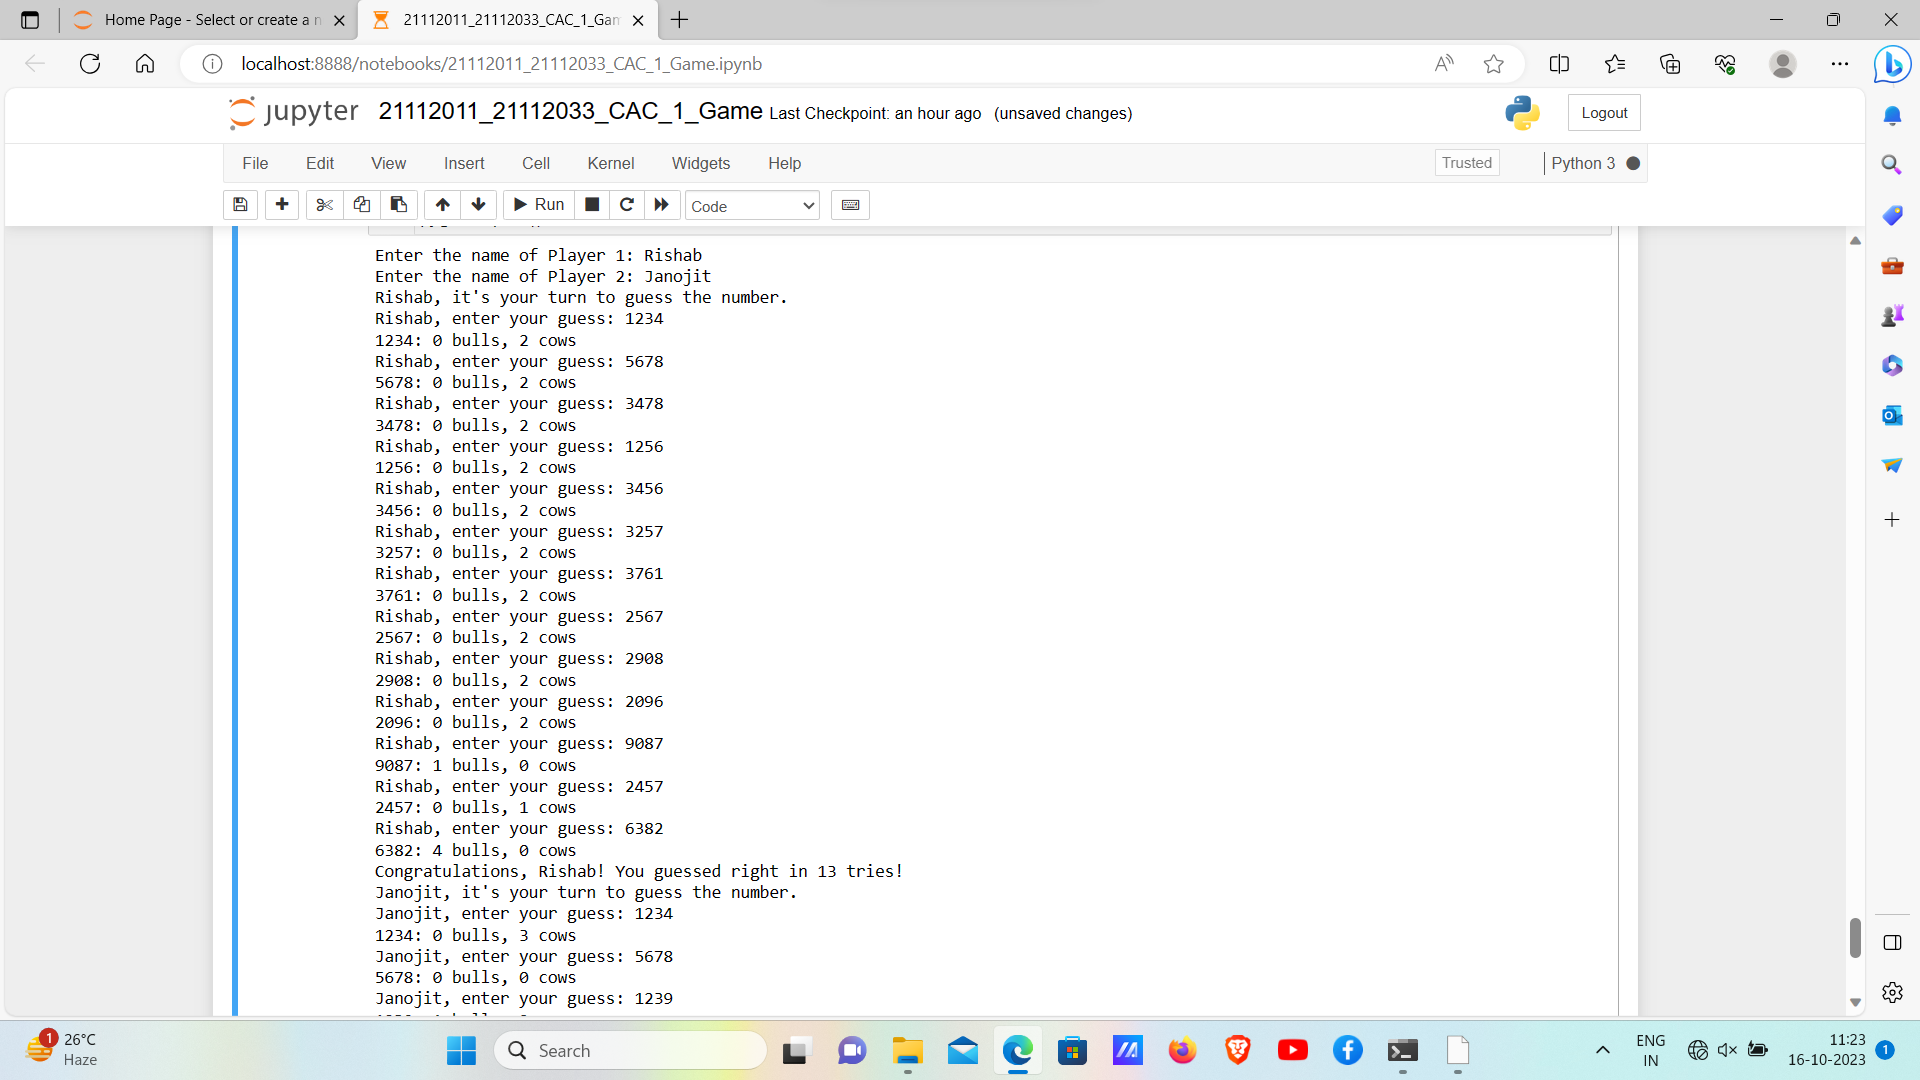

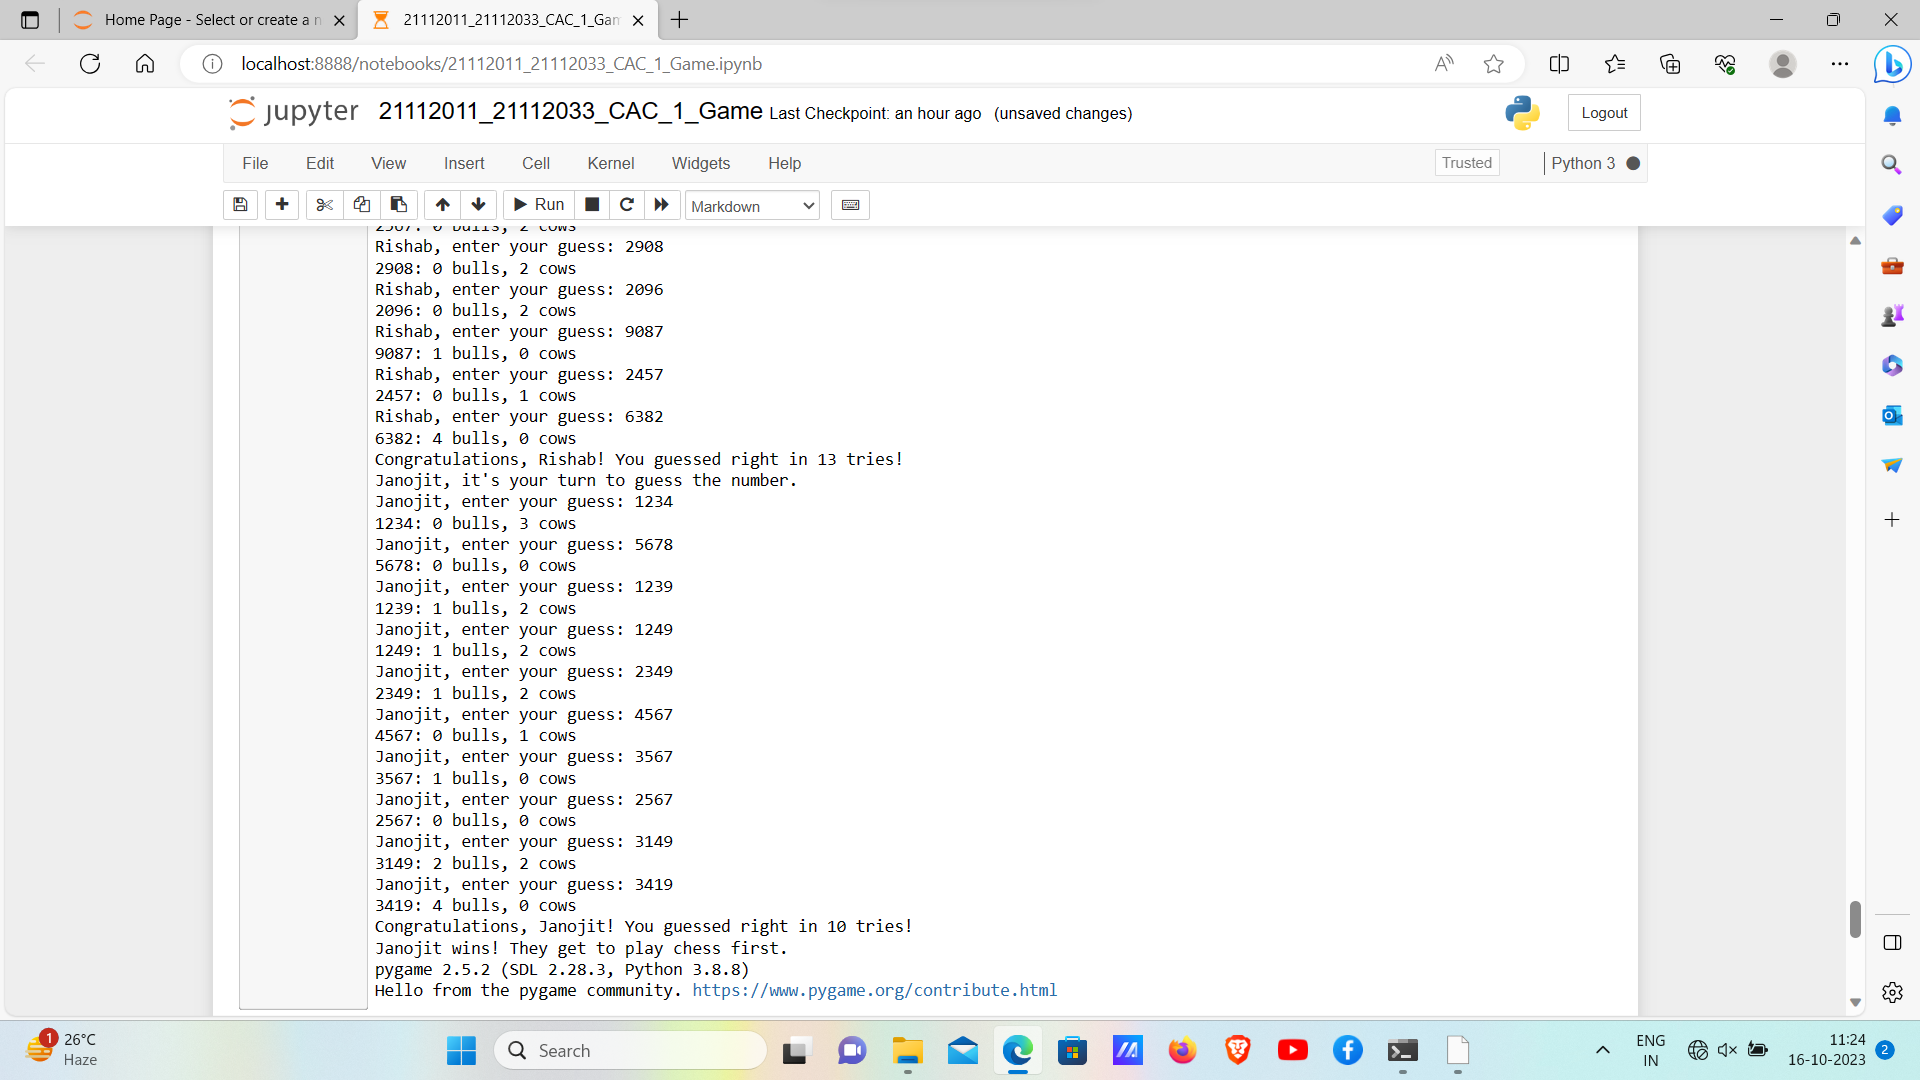

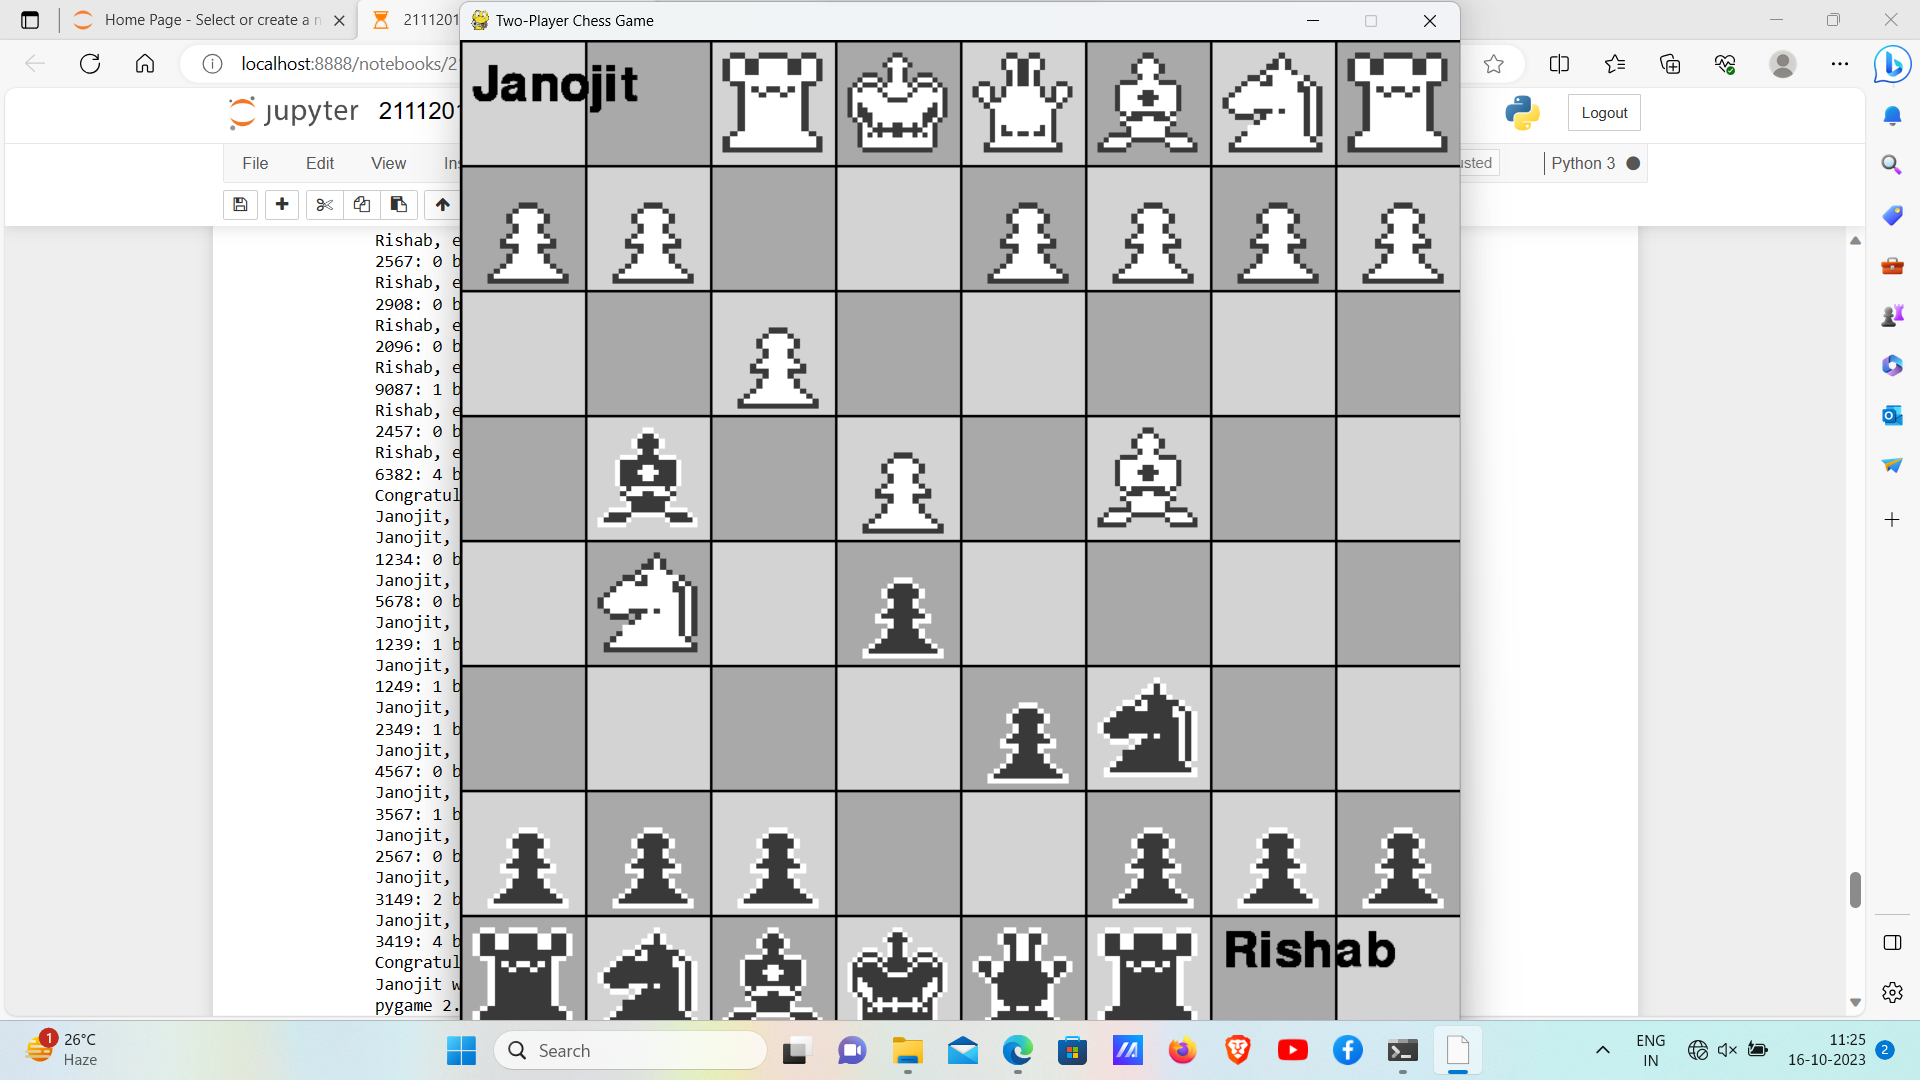